Start by importing necessary libraries to connect to database and load dataframe

In [1]:
#Import initial dependencies

import pandas as pd
import pyodbc 

#Establish connection to SQL database

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=tcp:group1-owner-nu.database.windows.net,1433;'
                      'Database=final-project;'
                      'Persist Security Info=False;'
                      'Uid=GROUPDB1NU;'
                      'Pwd=NU02282021!;'
                      'MultipleActiveResultSets=False;'
                      'Encrypt=Yes;'
                      'TrustServerCertificate=No;'
                      'Connection Timeout=30;')


cursor = conn.cursor()

#Read tables from SQL

initial_df = pd.read_sql("SELECT * FROM dbo.final_table", conn)

initial_df.head()


,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,VintagePrice,VintageRatingPriceRatio,Age,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,0.051221,9,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,0.052598,7,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,0.074718,6,4.3,869,57.55,0.074718
3,Abadal Nuat 2015,Abadal,Nuat,2015,None,None,4.1,29,31.99,0.128165,6,3.9,253,31.99,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.1,149,29.00,0.141379,6,4.2,1424,29.00,0.144828


Next assign features (X) and outcome variable (y), and drop duplicative or other features that are not useful. Finish cleaning by dropping NA values, ensuring Year column is numerical and float, and then analyze the features.

In [2]:
X = initial_df[["Winery", "WineName", "Year","Region", "RegionalVariety", "VintageRatingCount","VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingCount", "WineRatingPriceRatio"]]
y = initial_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 11) (4593, 1)


In [3]:
# Drop features
clean_df = initial_df.drop(['WineName', 'Region', 'RegionalVariety', 'VintageRatingCount', 'WineRatingCount', 'Age', 'WinePrice'], axis=1)
clean_df.head()

,FullName,Winery,Year,VintageRating,VintagePrice,VintageRatingPriceRatio,WineRating,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,2012,4.3,83.95,0.051221,4.3,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,2014,4.1,77.95,0.052598,4.3,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,2015,4.3,57.55,0.074718,4.3,0.074718
3,Abadal Nuat 2015,Abadal,2015,4.1,31.99,0.128165,3.9,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,2015,4.1,29.00,0.141379,4.2,0.144828


In [4]:
#Drop na values, ensure Year column has 2020 vs new vintage, and is a float
clean_df['Year'] = clean_df['Year'].replace(['N.V.'],'2020').dropna().astype(float)

In [5]:
clean_df.dtypes

FullName                    object
Winery                      object
Year                       float64
VintageRating              float64
VintagePrice               float64
VintageRatingPriceRatio    float64
WineRating                 float64
WineRatingPriceRatio       float64
dtype: object

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4593 entries, 0 to 4592
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FullName                 4593 non-null   object 
 1   Winery                   4593 non-null   object 
 2   Year                     4593 non-null   float64
 3   VintageRating            4593 non-null   float64
 4   VintagePrice             4593 non-null   float64
 5   VintageRatingPriceRatio  4593 non-null   float64
 6   WineRating               4593 non-null   float64
 7   WineRatingPriceRatio     4593 non-null   float64
dtypes: float64(6), object(2)
memory usage: 287.2+ KB


In [7]:
clean_df.describe()

,Year,VintageRating,VintagePrice,VintageRatingPriceRatio,WineRating,WineRatingPriceRatio
count,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000,4593.000000
mean,2013.627694,4.208295,103.891106,0.101720,4.159634,0.100227
std,3.907002,0.171775,437.899654,0.054876,0.175613,0.053594
min,1983.000000,3.900000,10.500000,0.000512,3.500000,0.000512
25%,2012.000000,4.100000,28.480000,0.057525,4.000000,0.057333
50%,2015.000000,4.200000,41.670000,0.100024,4.100000,0.098843
75%,2016.000000,4.300000,74.680000,0.144828,4.300000,0.142809
max,2020.000000,4.900000,9180.000000,0.380952,4.700000,0.361905


Using clean_df, reassign X features and y outcome variable and view the shape.

In [8]:
# Assign X and y using clean_df
X = clean_df[[ "Year", "VintagePrice", "VintageRatingPriceRatio", "WineRating", "WineRatingPriceRatio"]]
y = clean_df["VintageRating"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4593, 5) (4593, 1)


Using sklearn utilize standard scaler for the float features and ordinal encoder for the object features for standardization before running linear regression

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ct = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.float64)),
    (OrdinalEncoder(), make_column_selector(dtype_include=object))
)
ct.fit_transform(X)

array([[-0.41665485, -0.04554303, -0.92034151,  0.79937949, -0.91449465],
       [ 0.09530227, -0.05924629, -0.89524864,  0.79937949, -0.84092295],
       [ 0.35128084, -0.10583738, -0.49211979,  0.79937949, -0.47603031],
       ...,
       [ 1.11921652, -0.0869954 , -0.69054848,  0.22988205, -0.67920521],
       [ 0.09530227, -0.16720515,  0.52227993, -0.90911283,  0.5626328 ],
       [ 1.11921652, -0.18412868,  1.43555664, -0.90911283,  1.33736996]])

See model score using test linear regression 

In [11]:
#use train test split to test regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = make_pipeline(ct, LinearRegression())
model.fit(X, y)
model.score(X_test, y_test)

0.8640005437048607

Run linear regression model

In [12]:
X_encoded = ct.fit_transform(X)
y_encoded = y
lr = LinearRegression()
lr.fit(X_encoded, y_encoded)
lr.score(X_encoded, y_encoded)

0.877734987463609

In [13]:
# visualize pipeline
from sklearn import set_config
set_config(display="diagram")
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ED5ED2F9C8>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ED5ED67B08>)])),
                ('linearregression', LinearRegression())])

In [14]:
# steps that transform input data into a format understod by the model
model.steps

[('columntransformer',
  ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001ED5ED2F9C8>),
                                  ('ordinalencoder', OrdinalEncoder(),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001ED5ED67B08>)])),
 ('linearregression', LinearRegression())]

Use yellowbrick to view residuals plot for model and test

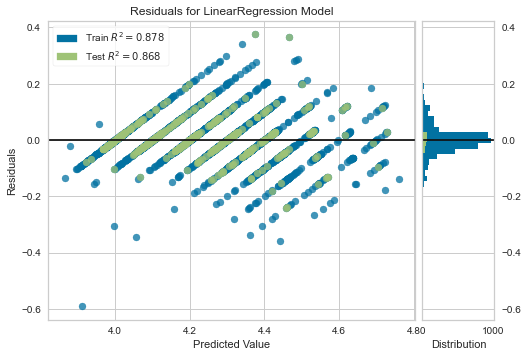

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:

from yellowbrick.regressor import ResidualsPlot

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
visualizer.score(X_test, y_test)
visualizer.show()

view MSE and R2 of test and model

In [23]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [24]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.003707934936639998, R2: 0.8678369719042848


In [21]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X)
MSE = mean_squared_error(y, predictions)
r2 = model.score(X, y)

In [22]:
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.003606829893097555, R2: 0.877734987463609


See pearson feature rankings using yellowbrick rank 2d

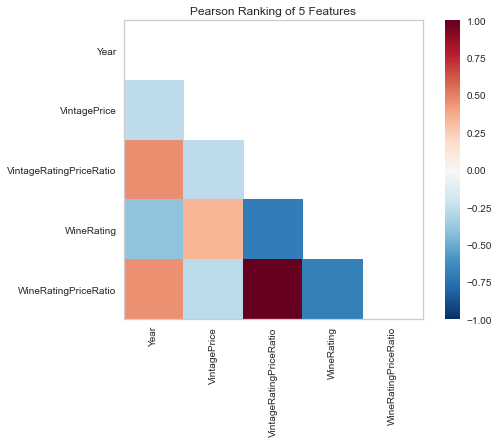

<AxesSubplot:title={'center':'Pearson Ranking of 5 Features'}>

In [18]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

In [19]:
#export clean_df for tableau
clean_df.to_csv('clean_df.csv', index=False)